<a href="https://colab.research.google.com/github/valievav/ML-projects/blob/main/MNIST_Feed_Forward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fully Connected Network (FCN) is the same as a Feedforward Neural Network (FNN)
# Every neuron in one layer is connected to every neuron in the next layer
# Information flows in one direction — from input to output — without cycles or loops.
# FCN/FNN = dense, fully connected layers. Great for tabular data or simple classification
# BfCPxoYCgo0

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)  # return same random numbers every time for reproducability & debugging


# Load data

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visuallize example

5


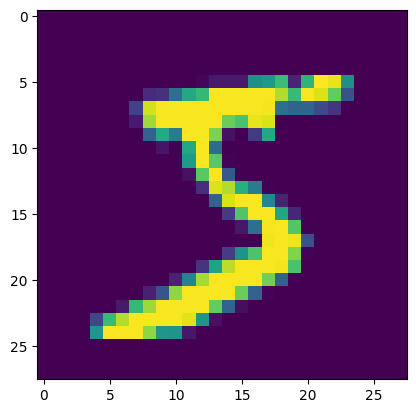

In [3]:
# visualize single example
plt.imshow(x_train[0])
print(y_train[0])

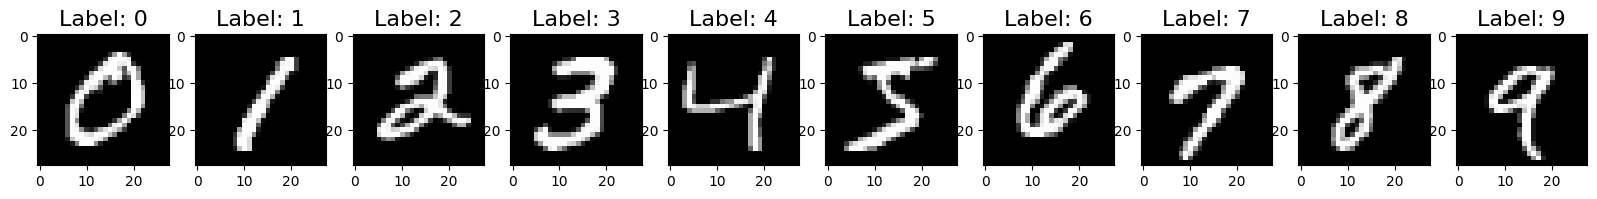

In [4]:
# visualize all 10 numbers
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f'Label: {i}', fontsize=16)


# Prepare labels

In [5]:
for i in range(num_classes):
  print(y_train[i])


5
0
4
1
9
2
1
3
1
4


In [6]:
# convert labels into one-hot encoded vectors (format NN works with better)
# Each row represents a class — only one position is “hot” (1), the rest are 0
# e.g. 0, 1, 0 -> 1 ; 0, 0, 1 -> 2 etc.
# this needed to eliminates any false sense of order and ensure that values are equally distinct
# e.g. labels 1, 2, 3 could be treated as different weights and as dependent, when they are not
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(num_classes):
  print(y_train[i])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare data

In [7]:
# normalize data (to values from 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train.shape


(60000, 28, 28)

In [8]:
# reshape data
# from 2D to 1D for the vector - flatten from 28*28 to a one long vector 784
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x_train.shape

(60000, 784)

# Create Model - Fully Connected Neural Network

In [9]:
model = Sequential()

shape = x_train.shape[1] # length of a vector

model.add(Dense(units=128, input_shape=(shape,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))  # reduce overfitting
model.add(Dense(units=10, activation='softmax'))   # since we have 10 different digits

model.compile(loss='categorical_crossentropy',  # categorical_crossentropy since labels are one-hot encoded, if not we'd need to use sparse_categorical_crossentropy
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train model

In [10]:
model.fit(x=x_train, y=y_train, batch_size=512, epochs=10)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6880 - loss: 1.0380
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9283 - loss: 0.2453
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9503 - loss: 0.1682
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9617 - loss: 0.1320
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9681 - loss: 0.1071
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9740 - loss: 0.0912
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9765 - loss: 0.0791
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9806 - loss: 0.0648
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9829 - loss: 0.0579
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9855 - loss: 0.0494


# Evaluate

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test loss: {test_loss}, Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0817
Test loss: 0.07178118079900742, Test Accuracy: 0.9775000214576721


In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # select max value, for e.g. predicted that this is 0 - 0.0004, 1 - 0.00001, .. 8 - 0.8965, 9 - 0.2345 -> max predicted is 9
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[1.83729094e-06 4.21147064e-07 2.10906874e-05 ... 9.99941647e-01
  6.82686220e-07 1.03394505e-05]
 [7.77541018e-08 8.48315176e-05 9.99904811e-01 ... 1.11043725e-07
  1.08329573e-07 4.47460732e-12]
 [1.44406113e-05 9.98358846e-01 3.35639983e-04 ... 5.93799574e-04
  4.12681286e-04 1.67994604e-05]
 ...
 [2.15888956e-11 8.06249734e-10 4.80618101e-10 ... 4.31134094e-06
  3.45842643e-08 1.11120071e-05]
 [1.47750370e-07 5.67512348e-09 5.06957476e-10 ... 8.45536174e-09
  4.43958532e-04 1.38532826e-07]
 [1.40930615e-06 1.05159437e-09 2.40343501e-09 ... 8.53438761e-12
  3.55760115e-08 5.75189618e-10]]
[7 2 1 ... 4 5 6]


[1.83729094e-06 4.21147064e-07 2.10906874e-05 2.40024874e-05
 1.79026163e-08 1.09119945e-07 5.33961375e-10 9.99941647e-01
 6.82686220e-07 1.03394505e-05]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


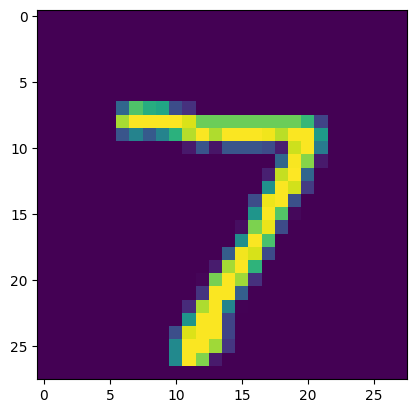

In [17]:
# single specific example
values = y_pred[0]  # contains predictions for each number
pred_v = np.argmax(y_pred[0])  # we take number with max percentage
print(values)
print(pred_v)

print(y_test[0])
plt.imshow(x_test[0].reshape(28, 28))

[7 2 1 ... 4 5 6]
6
6


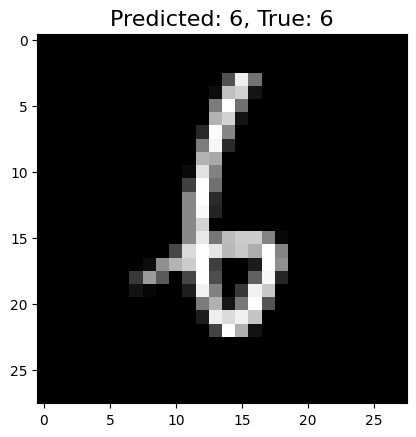

In [14]:
# single example with random index
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

print(y_true)
print(y_sample_true)
print(y_sample_pred_class)

# visualize
plt.title(f'Predicted: {y_sample_pred_class}, True: {y_sample_true}', fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')


# Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

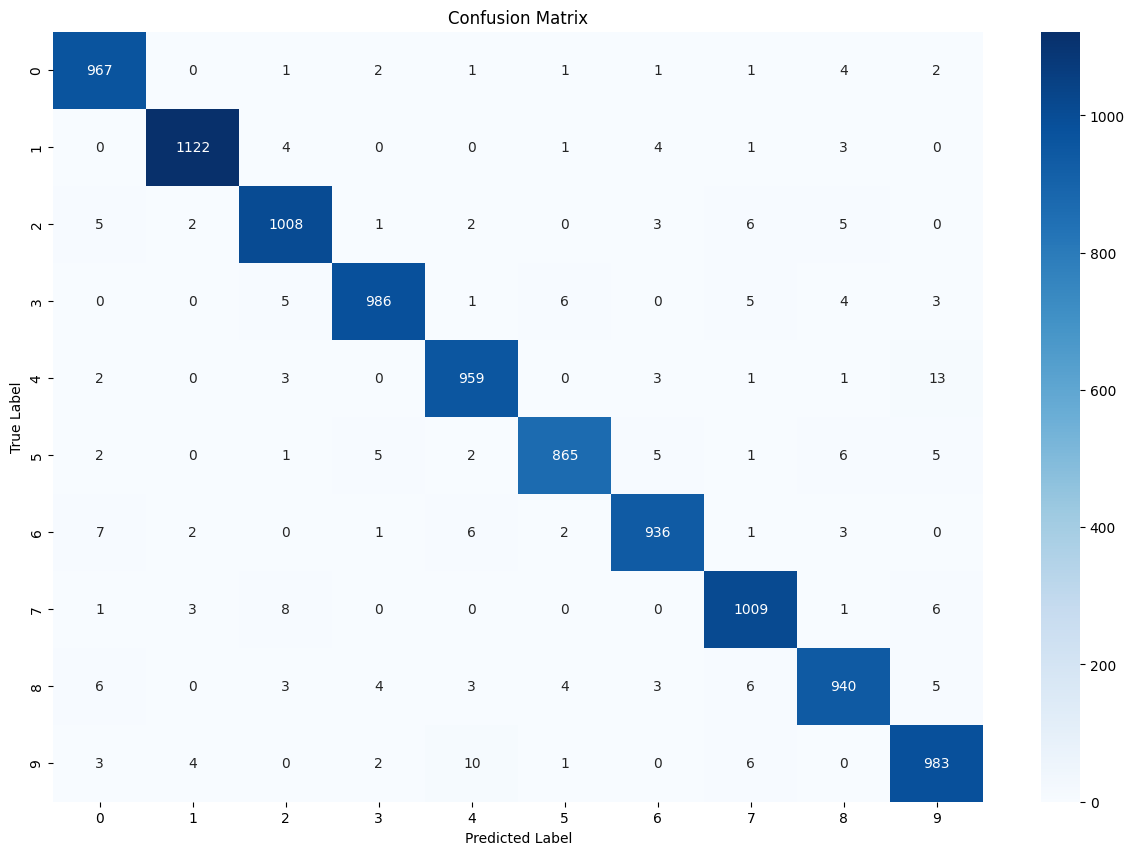

In [15]:
conf_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(conf_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')


# Investigate errors

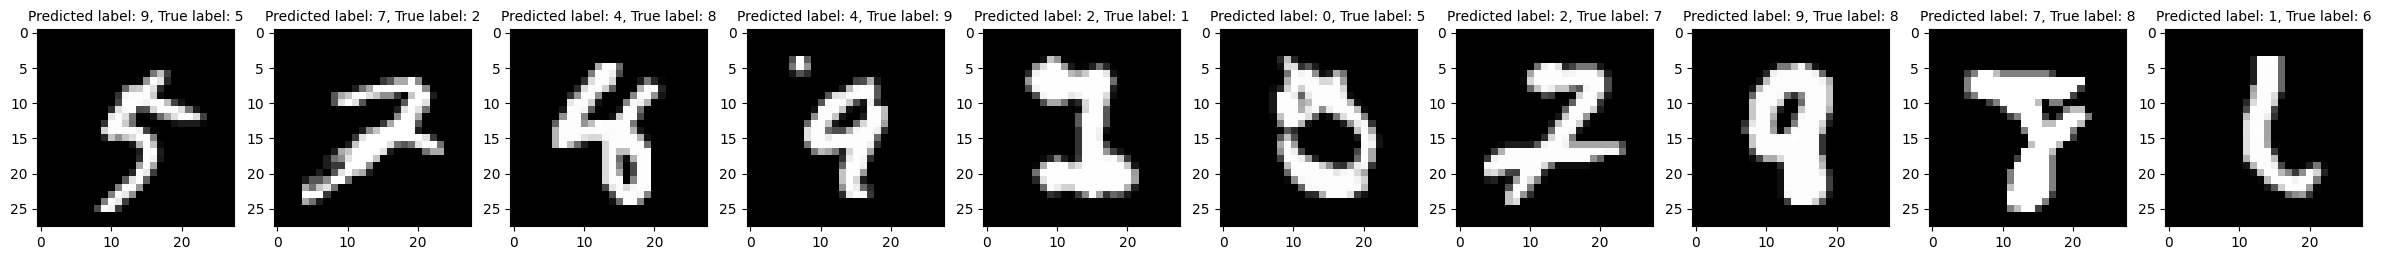

In [16]:
err = (y_pred_classes - y_true != 0)
y_pred_classes_err = y_pred_classes[err]
y_pred_err = y_pred[err]
y_true_err = y_true[err]
x_test_err = x_test[err]

# get values that model has most errors with
y_pred_err_prob = np.max(y_pred_err, axis=1)
true_prob_err = np.diagonal(np.take(y_pred_err, y_true_err, axis=1))
diff_err_pred_true = y_pred_err_prob - true_prob_err

sorted_ids_diff_err = np.argsort(diff_err_pred_true)
top_ids_diff_err = sorted_ids_diff_err[-10:]  # get last ones

# show top errors
num = len(top_ids_diff_err)
f, ax = plt.subplots(1, num, figsize=(30, 30))

for i in range(num):
  idx = top_ids_diff_err[i]
  sample = x_test_err[idx].reshape(28, 28)
  y_t = y_true_err[idx]
  y_p = y_pred_classes_err[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f'Predicted label: {y_p}, True label: {y_t}', fontsize=10)
